# Import software libraries and load the dataset #

In [173]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
- NumPy 1.26.1
- pandas 2.1.2
- Matplotlib 3.8.0
- scikit-learn 1.3.2



# Get acquainted with the dataset #

1. Import the iris dataset.
2. Convert the dataset to a dataframe.
    - The rows has the data.
    - Do not forget the column names.
    - Also the target label.
3. Print the first ten rows.

In [174]:
from sklearn.datasets import load_iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=['sepal length', 'sepal width','petal length', 'petal width'])
df['target'] = y

# Examine a general summary of statistics

In [168]:
df['target']=df['target'].astype('int64')
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Identify outliers

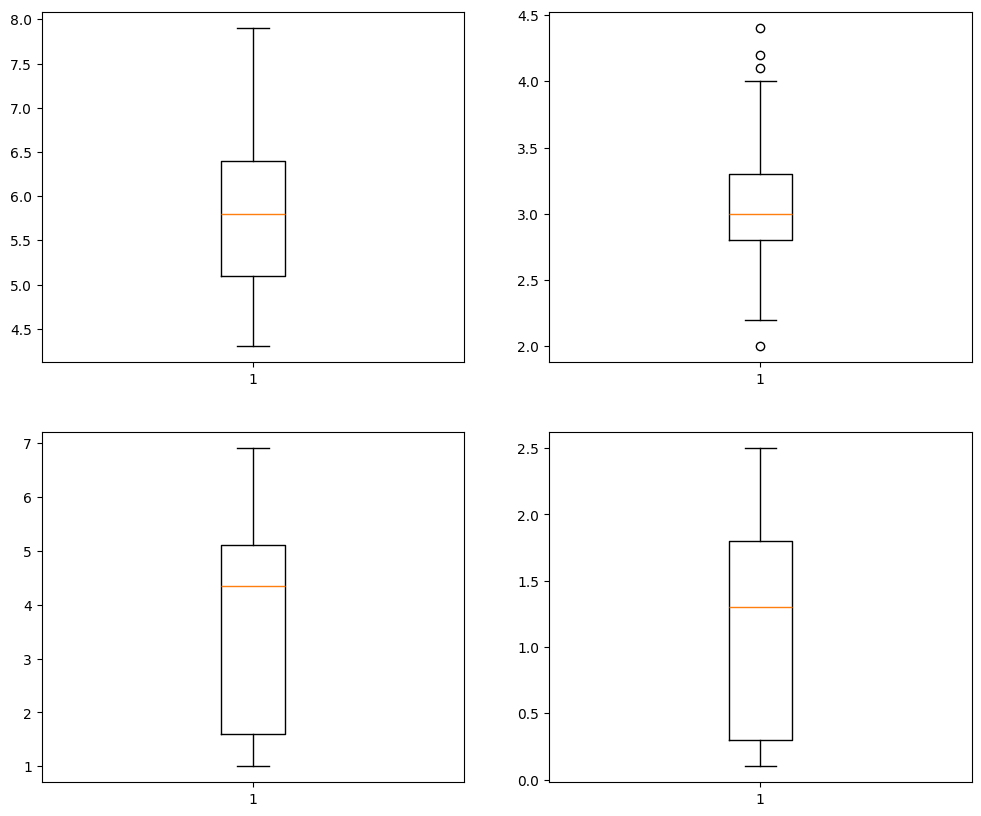

In [169]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].boxplot(df['sepal length'])

axs[0, 1].boxplot(df['sepal width'])

axs[1, 0].boxplot(df['petal length'])

axs[1, 1].boxplot(df['petal width'])

plt.show()

# Reduce the dimensionality of the dataset

- We want just two classes of the target label.

In [170]:
df['target'].replace(2.0,' ',inplace=True)
df = df.drop(df[df['target'] == ' '].index)
df['target'].value_counts()

target
0    50
1    50
Name: count, dtype: int64

# Examine the separation between classes using a scatter plot

- Sepal length along x-axis, sepal width along y-axis.

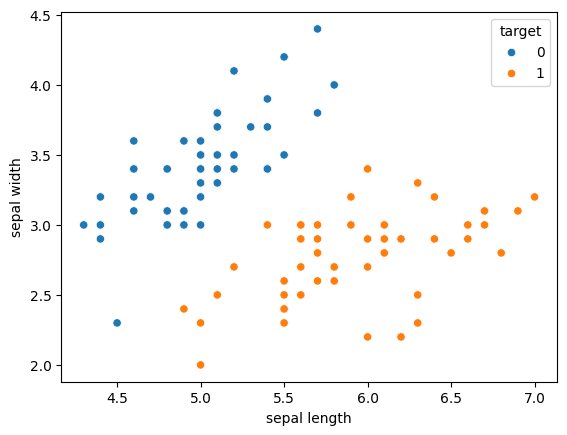

In [171]:
sb.scatterplot(data=df, x="sepal length", y="sepal width", hue="target")
plt.show()

# Plot a decision boundary for a given model

In [172]:
X = df[['sepal length', 'sepal width']]
y = df['target']
svc = SVC(kernel='linear')
svc.fit(X, y)
def decision_boundary(model, X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=80, linewidth=1)
    plt.show()
decision_boundary(svc, X, y)

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

# Train a basic logistic regression model and plot its decision boundary

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
decision_boundary(logmodel, X_train, y_train)

target
0    50
1    50
Name: count, dtype: int64

# Train an SVM model and plot its decision boundary plus margins

- Make the C parameter = 100.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc = SVC(kernel='linear')
svc.fit(X, y)
decision_boundary(logmodel, X_train, y_train)

# Reduce the regularization penalty to soften the margin

- Make the C parameter = 0.1

# Split the datasets

# Evaluate an SVM model using a holdout test set